In [7]:
import cv2

import torch
import torch.nn as nn
import torchvision

import matplotlib.pyplot as plt
%matplotlib inline

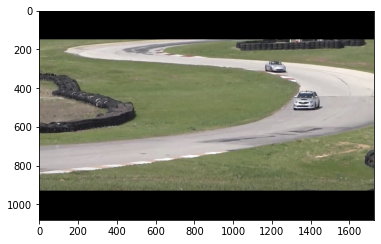

In [2]:
cap = cv2.VideoCapture('race_car.mp4')

ret, frm = cap.read()
plt.imshow(frm[:, :, ::-1])

In [3]:
cnn = torchvision.models.resnet18(pretrained=True)
conv = nn.Sequential(
    *list(cnn.children())[:-1],
    nn.Flatten()
)

rnn = nn.LSTM(input_size=512, 
             hidden_size=512, 
             num_layers=2)
rnn

LSTM(512, 512, num_layers=2)

In [4]:
bsize = 10
seqsize = 1
h0 = torch.randn(2, bsize, 512)
c0 = torch.randn(2, bsize, 512)
embed = torch.randn(1, bsize, 512)
out, (hi, ci) = rnn(embed, (h0, c0))

out.shape

torch.Size([1, 10, 512])

In [5]:
prepr = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])
])

In [6]:
class VideoNet(nn.Module):
    def __init__(self):
        super(VideoNet, self).__init__()
        
        cnn = torchvision.models.resnet18(pretrained=True)
        self.conv = nn.Sequential(
            *list(cnn.children())[:-1],
            nn.Flatten()
        )
        self.rnn = nn.LSTM(input_size=512, 
                           hidden_size=512, 
                           num_layers=2)
        self.fc = nn.Sequential(
            nn.Linear(512, 7),
            nn.Softmax(dim=-1),
        )
        
    def forward(self, x, h0, c0):
        bsize = x.shape[0]
        embed = self.conv(x).reshape(-1, bsize, 512)
        out, (h, c) = self.rnn(embed, (h0, c0))
        out = self.fc(out)
        return out, (h, c)
        
model = VideoNet()

In [66]:
tmp = torch.randn(10, 3, 224, 224)

out, (h, c) = model(tmp, h0, c0)

In [ ]:
bsize = 1
h = torch.randn(2, bsize, 512)
c = torch.randn(2, bsize, 512)

while True:
    ret, frm = cap.read()
    if not ret:
        break
        
    frm_tens = prepr(frm).reshape(-1, 3, 224, 224)
    out, (h, c) = model(frm_tens, h, c)
    
    print('Check')

Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check
Check


# Retinaface

In [1]:
import cv2
import numpy as np

import torch
import torch.nn as nn
import torchvision

import matplotlib.pyplot as plt
%matplotlib inline

im = cv2.imread('data/tests/choir.jpg')

In [2]:
from inference import Inference

net = Inference('retinaface_tmp/weights/mobilenet0.25_Final.pth',
                'mobile0.25', use_cpu=True)

new_width = 1280
new_height = 720
im = cv2.resize(im, (new_width, new_height))
# boxes, scores, landmarks = net(im)

Loading pretrained model from retinaface_tmp/weights/mobilenet0.25_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:300
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (stage1): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1, inplace=True)
      )
      (1): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8, bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1, inplace=True)
        (3): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): LeakyReLU(negative_slope=0.1

In [3]:
%time
boxes, scores, landmarks = net(im)

CPU times: user 9 µs, sys: 3 µs, total: 12 µs
Wall time: 22.2 µs


In [3]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

def display_text(im, text, x, y):

    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
               
    # cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);
    cv2.putText(im, text, (x, y-5), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)

def display_objects(im, objects, threshold=0.25):

    rows = im.shape[0]; cols = im.shape[1]
    boxes, scores = objects
    for i in range(len(boxes)):
        score = scores[i]
        box = boxes[i]
        # display_text(im, "{:.02f}".format(score), box[0], box[1])
        cv2.rectangle(im, (box[0], box[1]), (box[2], box[3]), (255, 255, 255), 2)

    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15)); plt.imshow(mp_img); plt.show();

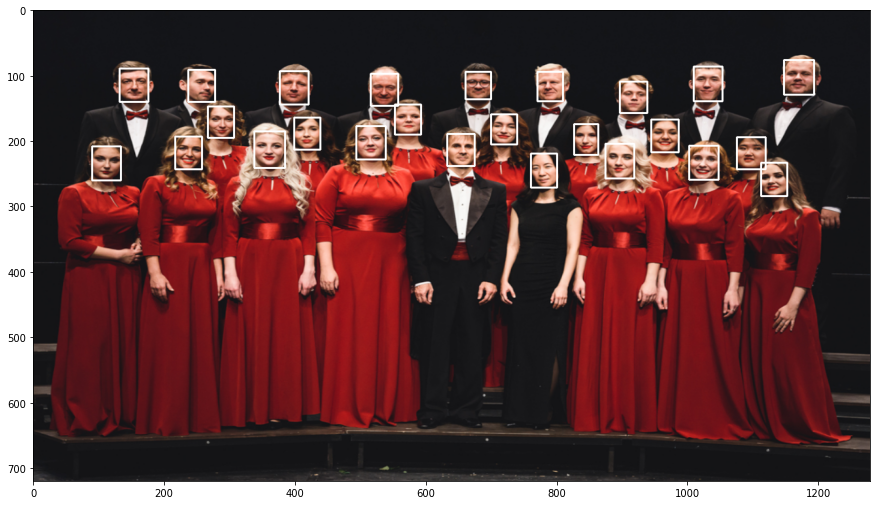

In [4]:
display_objects(im, (boxes, scores))

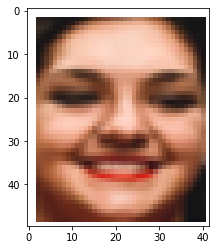

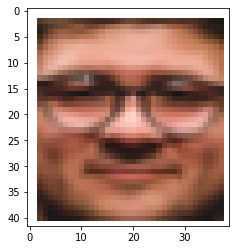

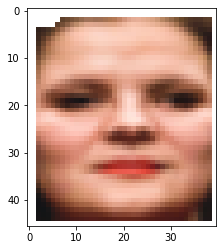

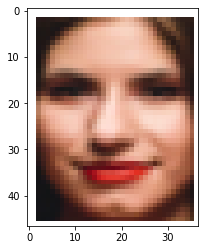

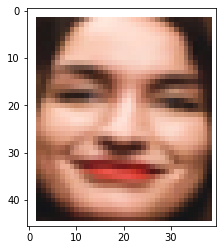

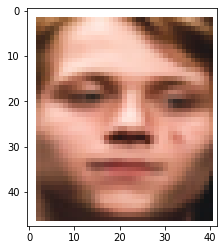

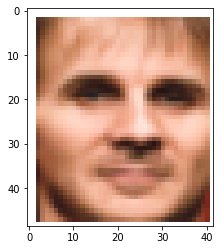

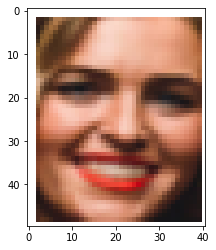

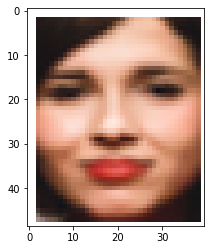

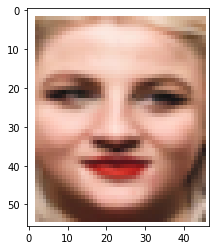

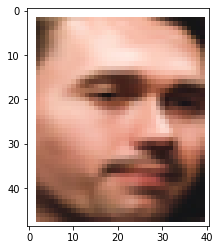

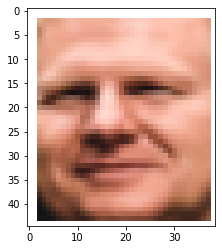

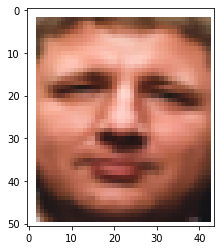

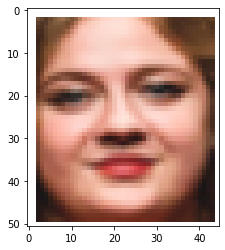

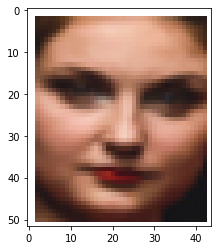

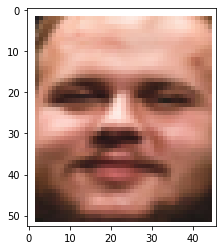

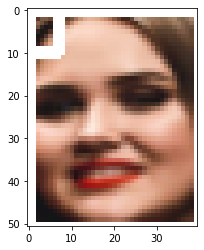

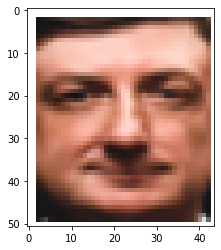

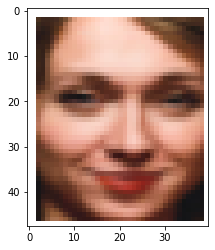

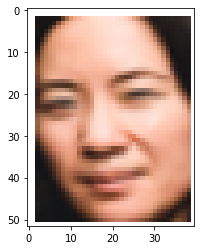

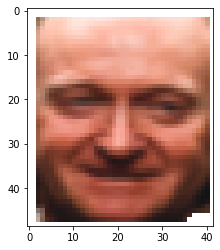

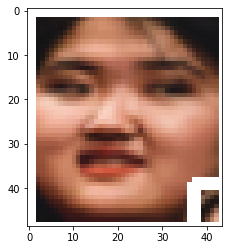

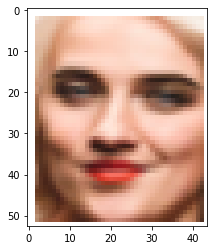

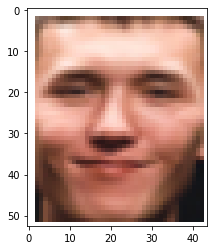

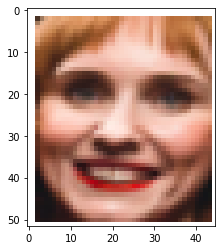

In [5]:
prepr = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])
])

faces = torch.zeros(len(boxes), 3, 224, 224)
for i, box in enumerate(boxes):
    face = im[box[1]:box[3], box[0]:box[2]]
    faces[i] = prepr(face)
    plt.imshow(face[:, :, ::-1]); plt.show();

In [6]:
class AffectNN(nn.Module):
    def __init__(self):
        super(AffectNN, self).__init__()
        
        cnn = torchvision.models.resnet18(pretrained=True)
        self.conv = nn.Sequential(
            *list(cnn.children())[:-1],
            nn.Flatten()
        )
        self.fc = nn.Sequential(
            nn.Linear(512, 8),
            nn.Softmax(dim=-1),
        )
    def forward(self, x):
        out = self.conv(x)
        out = self.fc(out)
        return out
    
fer = AffectNN()

pred = fer(faces)

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [7]:
emotions = {
    0:'neutral',
    1:'happy',
    2:'sad',
    3:'surpise',
    4:'fear',
    5:'distgust',
    6:'angry',
    7:'contempt'
}

aff_pred = torch.argmax(pred, dim=-1).tolist()

In [8]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

def display_text(im, text, x, y):

    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
               
    # cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);
    cv2.putText(im, text, (x, y-5), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)

def display_objects(im, objects, aff_pred):

    rows = im.shape[0]; cols = im.shape[1]
    boxes, scores = objects
    for i in range(len(boxes)):
        box = boxes[i]
        display_text(im, "{}".format(emotions[aff_pred[i]]), box[0], box[1])
        cv2.rectangle(im, (box[0], box[1]), (box[2], box[3]), (255, 255, 255), 2)

    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15)); plt.imshow(mp_img); plt.show();

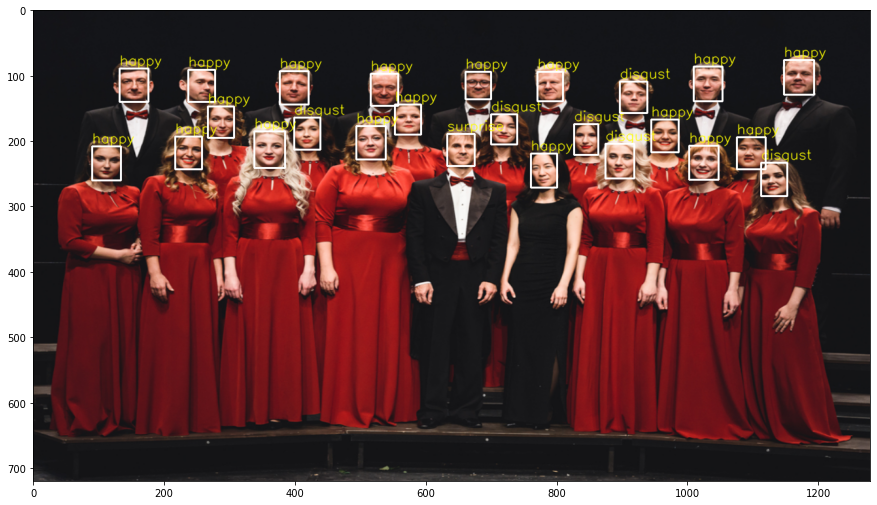

In [9]:
display_objects(im, (boxes, scores), aff_pred)

# End-to-end AffectNN

In [1]:
import cv2
import numpy as np

import torch
import torch.nn as nn
import torchvision

import matplotlib.pyplot as plt
%matplotlib inline

im = cv2.imread('data/tests/choir.jpg')

In [2]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

def display_text(im, text, x, y):

    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
               
    # cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);
    cv2.putText(im, text, (x, y-5), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)

def display_objects(im, boxes, aff_pred):

    rows = im.shape[0]; cols = im.shape[1]
    for i in range(len(boxes)):
        box = boxes[i]
        display_text(im, "{}".format(emotions[aff_pred[i]]), box[0], box[1])
        cv2.rectangle(im, (box[0], box[1]), (box[2], box[3]), (255, 255, 255), 2)

    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15)); plt.imshow(mp_img); plt.show();

In [3]:
from inference import Inference
prepr = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])
])

emotions = {
    0:'neutral',
    1:'happy',
    2:'sad',
    3:'surpise',
    4:'fear',
    5:'distgust',
    6:'angry',
    7:'contempt'
}

class AffectNN(nn.Module):
    def __init__(self):
        super(AffectNN, self).__init__()
        
        self.detect = Inference('retinaface_tmp/weights/mobilenet0.25_Final.pth',
                                'mobile0.25', use_cpu=True)
        
        cnn = torchvision.models.resnet10(pretrained=True)
        self.conv = nn.Sequential(
            *list(cnn.children())[:-1],
            nn.Flatten()
        )
        self.fc = nn.Sequential(
            nn.Linear(512, 7),
            nn.Softmax(dim=-1),
        )
    def forward(self, x):
        new_width = 1280
        new_height = 720
        x = cv2.resize(x, (new_width, new_height))
        boxes, scores, landmarks = self.detect(x)
        
        faces = torch.zeros(len(boxes), 3, 224, 224)
        for i, box in enumerate(boxes):
            face = x[box[1]:box[3], box[0]:box[2]]
            faces[i] = prepr(face)
            
        out = self.conv(faces)
        affects = self.fc(out)
        return boxes, affects
    
fer = AffectNN()

Loading pretrained model from retinaface_tmp/weights/mobilenet0.25_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:300
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (stage1): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1, inplace=True)
      )
      (1): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8, bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1, inplace=True)
        (3): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): LeakyReLU(negative_slope=0.1

AttributeError: module 'torchvision.models' has no attribute 'resnet10'

In [4]:
from inference import Inference
prepr = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((84, 84)),
    torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])
])

emotions = {
    0:'neutral',
    1:'happy',
    2:'sad',
    3:'surpise',
    4:'fear',
    5:'distgust',
    6:'angry',
    7:'contempt'
}

class AffectNN(nn.Module):
    def __init__(self):
        super(AffectNN, self).__init__()
        
        self.detect = Inference('retinaface_tmp/weights/mobilenet0.25_Final.pth',
                                'mobile0.25', use_cpu=True)
        
        cnn = torchvision.models.mobilenet_v2(pretrained=True)
        # self.conv = nn.Sequential(
        #     *list(cnn.children())[:-1],
        #     nn.Flatten()
        # )
        
        self.conv = nn.Sequential(
            # self.conv1 = 
            nn.Sequential(
                nn.Conv2d(3, 16, kernel_size=(3, 3)),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(kernel_size=(2, 2)),
                nn.ReLU()
            ),

            # self.conv2 = 
            nn.Sequential(
                nn.Conv2d(16, 64, kernel_size=(3, 3)),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(kernel_size=(2, 2)),
                nn.ReLU()
            ),

            # self.conv3 = 
            nn.Sequential(
                nn.Conv2d(64, 128, kernel_size=(3, 3)),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(kernel_size=(2, 2)),
                nn.ReLU()
            ),

            # self.conv4 = 
            nn.Sequential(
                nn.Conv2d(128, 256, kernel_size=(3, 3)),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(kernel_size=(2, 2)),
                nn.ReLU()
            ),
            
            nn.Flatten()
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 9, 8),
            nn.Softmax(dim=-1),
        )
    def forward(self, x):
        new_width = 1280
        new_height = 720
        x = cv2.resize(x, (new_width, new_height))
        boxes, scores, landmarks = self.detect(x)
        
        faces = torch.zeros(len(boxes), 3, 84, 84)
        for i, box in enumerate(boxes):
            face = x[box[1]:box[3], box[0]:box[2]]
            faces[i] = prepr(face)
            
        out = self.conv(faces)
        affects = self.fc(out)
        return boxes, affects
    
fer = AffectNN()

Loading pretrained model from retinaface_tmp/weights/mobilenet0.25_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:300
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (stage1): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1, inplace=True)
      )
      (1): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8, bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1, inplace=True)
        (3): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): LeakyReLU(negative_slope=0.1

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


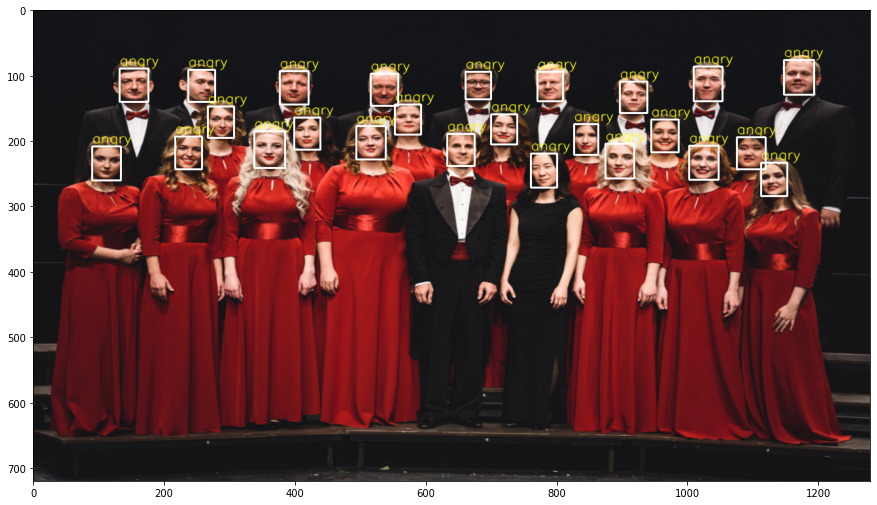

CPU times: user 1.3 s, sys: 254 ms, total: 1.55 s
Wall time: 600 ms


In [5]:
%%time
pred = fer(im)

new_width = 1280
new_height = 720
im = cv2.resize(im, (new_width, new_height))
display_objects(im, pred[0], torch.argmax(pred[1], dim=-1).tolist())

In [9]:
cnn = torchvision.models.mobilenet_v2(pretrained=True)
conv = nn.Sequential(
    *list(cnn.children())[:-1],
    nn.Flatten()
)
fc = nn.Sequential(
    nn.Linear(62720, 8),
    nn.Softmax(dim=-1)
)
model = nn.Sequential

Sequential(
  (0): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1,

In [10]:
tmp = torch.randn(10, 3, 224, 224)
conv(tmp).shape

torch.Size([10, 62720])

In [ ]:
class TinyConv(nn.Module):
    def __init__(self):
        super(TinyConv, self).__init__()
        
        self.conv1 = nn.Sequetial(
            nn.Conv2d(3, 16, kernel_size=(3, 3))
            nn.Dropout(p=0.2)
            nn.MaxPool2d(kernel_size=(2, 2))
            nn.ReLU()
        )
        
        # self.conv2 = nn.Conv2d(16, 64, kernel_size=(3, 3))

In [24]:
conv = nn.Sequential(
    # self.conv1 = 
    nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=(3, 3)),
        nn.Dropout(p=0.2),
        nn.MaxPool2d(kernel_size=(2, 2)),
        nn.ReLU()
    ),
    
    # self.conv2 = 
    nn.Sequential(
        nn.Conv2d(16, 64, kernel_size=(3, 3)),
        nn.Dropout(p=0.2),
        nn.MaxPool2d(kernel_size=(2, 2)),
        nn.ReLU()
    ),
    
    # self.conv3 = 
    nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=(3, 3)),
        nn.Dropout(p=0.2),
        nn.MaxPool2d(kernel_size=(2, 2)),
        nn.ReLU()
    ),
    
    # self.conv4 = 
    nn.Sequential(
        nn.Conv2d(128, 256, kernel_size=(3, 3)),
        nn.Dropout(p=0.2),
        nn.MaxPool2d(kernel_size=(2, 2)),
        nn.ReLU()
    )
)

tmp = torch.randn(10, 3, 84, 84)
conv(tmp).shape

torch.Size([10, 256, 3, 3])